# Section-3
# Unsupervised Learning


## Name-Komal , Student-id -33275440

In [30]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


# Question 3 -I


In [31]:
# Load the labeled data
labeled_data = pd.read_csv('Task2C_labeled.csv')

# Load the unlabeled data
unlabeled_data = pd.read_csv('Task2C_unlabeled.csv')

# Load the test data
test_data = pd.read_csv('Task2C_test.csv')


In [32]:
labeled_data.shape

(50, 785)

In [33]:
labeled_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
unlabeled_data.shape

(1500, 784)

In [35]:
unlabeled_data.head()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
test_data.shape

(500, 785)

In [37]:
test_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#dropping label column from labeled dataset
#then creating a combined dataset that is used for training an autoencoder.
all_data = pd.concat([labeled_data.drop('label', axis=1), unlabeled_data], axis=0)
all_data.shape

(1550, 784)

# part-II
### Train an autoencoder with only one hidden layer and change the number of its neurons to 20,60, 100, ..., 220 (i.e. from 20 to 220 with a step size of 40).

In [39]:
# Convert Pandas dataframes to PyTorch tensors
all_data_tensor = torch.tensor(all_data.values, dtype=torch.float32)
# Create a dataset from tensors
dataset = TensorDataset(all_data_tensor, all_data_tensor)  


In [40]:
# Create a data loader
#The autoencoder consists of two parts, the encoder and decoder.
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)
torch.manual_seed(132) #setting seed
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        #The encoder compresses the input to a latent space defined by hidden_size.
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(True) #ReLU for non-linearity
        )
        #The decoder attempts to reconstruct the original input 
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()  # use sigmoid if the input range is [0,1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def encode(self, x):
        return self.encoder(x)
    
    

In [41]:
def train_autoencoder(model, dataloader, epochs=50):
    criterion = nn.MSELoss() #calculating MSE
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(epochs):
        for data, _ in dataloader:
            # Forward pass
            output = model(data)
            loss = criterion(output, data)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return model

In [42]:
input_size = 784  # Number of pixels for each image whhich are number of input features.
hidden_sizes = range(20, 221, 40)  # From 20 to 220 with a step of 40

for hidden_size in hidden_sizes:
    print(f"Training autoencoder with {hidden_size} hidden neurons.")
    autoencoder = Autoencoder(input_size, hidden_size)
    trained_autoencoder = train_autoencoder(autoencoder, dataloader)
    torch.save(trained_autoencoder.state_dict(), f'autoencoder_{hidden_size}.pth')

Training autoencoder with 20 hidden neurons.
Epoch [10/50], Loss: 8496.3916
Epoch [20/50], Loss: 7812.0693
Epoch [30/50], Loss: 7770.3857
Epoch [40/50], Loss: 7030.8521
Epoch [50/50], Loss: 6545.2812
Training autoencoder with 60 hidden neurons.
Epoch [10/50], Loss: 6730.3022
Epoch [20/50], Loss: 6833.6196
Epoch [30/50], Loss: 5902.7588
Epoch [40/50], Loss: 8067.5884
Epoch [50/50], Loss: 7376.9395
Training autoencoder with 100 hidden neurons.
Epoch [10/50], Loss: 6983.9717
Epoch [20/50], Loss: 6851.3179
Epoch [30/50], Loss: 6684.1787
Epoch [40/50], Loss: 7516.8169
Epoch [50/50], Loss: 6339.9497
Training autoencoder with 140 hidden neurons.
Epoch [10/50], Loss: 7077.6182
Epoch [20/50], Loss: 6664.1304
Epoch [30/50], Loss: 7550.6890
Epoch [40/50], Loss: 7321.3535
Epoch [50/50], Loss: 9308.5293
Training autoencoder with 180 hidden neurons.
Epoch [10/50], Loss: 7621.9810
Epoch [20/50], Loss: 6417.0020
Epoch [30/50], Loss: 7650.8062
Epoch [40/50], Loss: 7067.9722
Epoch [50/50], Loss: 7909.03

# Part -III

In [43]:
#function to calculate and record reconstruction error
def calculate_average_euclidean_distance(model, dataloader):
    total_distance = 0
    count = 0
    
    model.eval()
    with torch.no_grad():  # will help for reducing memory usage since gradients are not needed
        for data, _ in dataloader:
            # As TensorDataset is created with all_data_tensor as both the inputs and the targets: 
            #TensorDataset(all_data_tensor, all_data_tensor)so ignoring second element.
            reconstructed = model(data)
            distances = torch.sqrt(torch.sum((data - reconstructed) ** 2, dim=1)) 
            # Calculating Euclidean distance for each sample in the batch
            total_distance += distances.sum().item()
            count += data.size(0)
    
    average_distance = total_distance / count
    return average_distance
    

In [44]:
input_size = 784 # Number of pixels for each image which are number of input features.
hidden_sizes = range(20, 221, 40)
reconstruction_errors = []
torch.manual_seed(132)
for hidden_size in hidden_sizes:
    # Load each model
    model = Autoencoder(input_size, hidden_size)
    model.load_state_dict(torch.load(f'autoencoder_{hidden_size}.pth'))
    
    # Calculate reconstruction error
    error = calculate_average_euclidean_distance(model, dataloader)
    

    reconstruction_errors.append(error)
    print(f"Reconstruction error for {hidden_size} neurons: {error}")


Reconstruction error for 20 neurons: 2339.0163986895163
Reconstruction error for 60 neurons: 2338.3255191532257
Reconstruction error for 100 neurons: 2338.1482094254034
Reconstruction error for 140 neurons: 2338.132197580645
Reconstruction error for 180 neurons: 2338.0950075604837
Reconstruction error for 220 neurons: 2338.0744632056453


### Plot these values where the x-axis is the number of units in the middle layerand the y-axis is the reconstruction error.

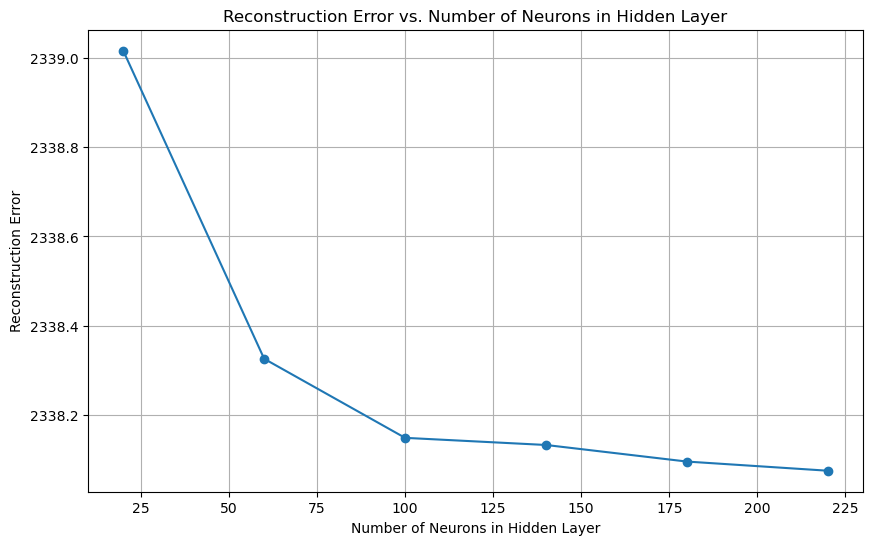

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(hidden_sizes), reconstruction_errors, marker='o')
plt.title("Reconstruction Error vs. Number of Neurons in Hidden Layer")
plt.xlabel("Number of Neurons in Hidden Layer")
plt.ylabel("Reconstruction Error")
plt.grid(True)
plt.show()


## Findings From plot

* The graph shows a general trend of decreasing reconstruction error as the number of neurons in the hidden layer increases from 20 to around 225. This suggests that increasing the capacity of the model allows it to capture more complexities of the data, thus improving its ability to reconstruct the original inputs more accurately.


* As the number of neurons continues to increase beyond between 100-125 and after 175, the decrease in error becomes less pronounced, and the curve starts to flatten. This indicates that beyond a certain point, adding more neurons does not improve the model's performance, which could be due to diminishing returns where the model has captured the most significant features of the data.

* Increasing the number of neurons helps to reduce the reconstruction error to a certain extent. From the plot, it appears that the optimal number of neurons could be around where the curve begins to flatten (around 100 neurons), as adding more neurons beyond this point shows minimal improvements in reducing the reconstruction error.


# Part -IV

### Build the 3-layer NN to build a classification model using all the original attributes from the training set and change the number of its neurons to 20, 60, 100, ..., 220 (i.e. from 20 to 220 with a step size of 40). For each model, calculate and record the test error.

In [46]:
labeled_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
test_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Prepare data for training the classifier
X_train = labeled_data.drop('label', axis=1)
y_train = labeled_data['label']
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (50, 784)
y_train shape: (50,)


In [49]:
# Initialize lists to store test errors and hidden layer sizes
list_error = []
hidden_layer_sizes = range(20, 221, 40) #step size of 40

# Loop over different hidden layer sizes
for hidden_size in hidden_layer_sizes:
    # Define and initialize the classifier model 
    classifier = MLPClassifier(hidden_layer_sizes=(hidden_size,), activation='tanh', max_iter=1000, random_state=42)

    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict labels for test data
    y_pred = classifier.predict(test_data.drop('label', axis=1))
    
    # Calculate test error
    error = 1.0 - accuracy_score(test_data['label'], y_pred)
    list_error.append(error)
    
    print(f'Test Error for {hidden_size} neurons in each hidden layer: {error:.4f}')

/Users/komalattrey/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Error for 20 neurons in each hidden layer: 0.6600
Test Error for 60 neurons in each hidden layer: 0.5380
Test Error for 100 neurons in each hidden layer: 0.4320
Test Error for 140 neurons in each hidden layer: 0.4860
Test Error for 180 neurons in each hidden layer: 0.4740
Test Error for 220 neurons in each hidden layer: 0.4900


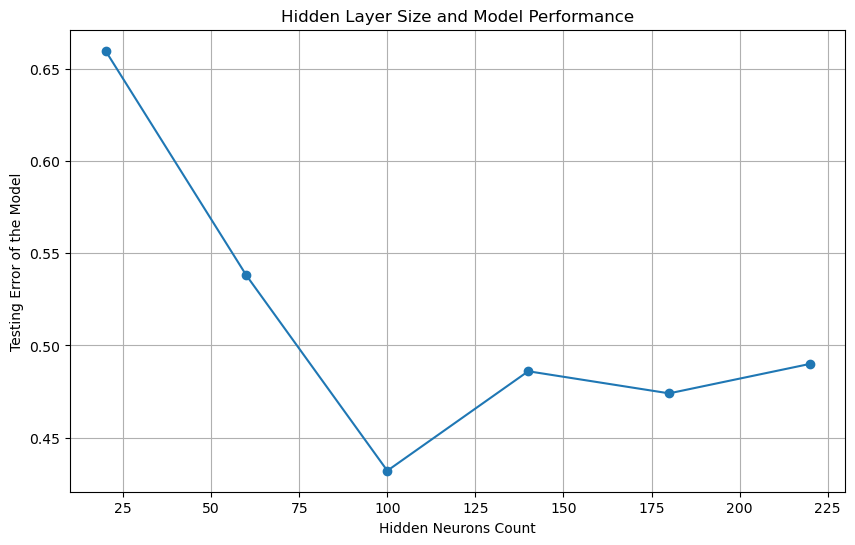

In [50]:
# Plot test errors vs. number of neurons
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes, list_error, marker='o')
plt.title("Hidden Layer Size and Model Performance")
plt.xlabel("Hidden Neurons Count")
plt.ylabel("Testing Error of the Model")
plt.grid(True)
plt.show()

   Graph Analysis for test error and number of neurons in hidden layer: The test error decreases significantly as the number of neurons increases from 20 to 100, suggesting an improvement in the model's capacity to capture the underlying patterns in the data.A slight increase in test error after 100 neurons could indicate a minor instability in model performance at this configuration.The lowest error is observed at 100 neurons, which may suggest an optimal balance between model complexity and generalization for the given dataset.The test errors for 125 and 175 neurons are still quite low, indicating sustained model performance even with increased complexity.

# Part-V 

In [51]:
#using pre-trained autoencoder from above 
# Initialize the autoencoder with specific input and hidden layer size
autoencoder = Autoencoder(input_size=784, hidden_size=100)  # 784 input features
autoencoder.load_state_dict(torch.load('autoencoder_100.pth'))  # Loading pre-trained weights
encoded_features = autoencoder.encode(all_data_tensor) 


In [52]:
# Convert PyTorch tensors to NumPy
encoded_features_np = encoded_features.detach().numpy() # Convert training data to tensor
# Augment the original features with encoded features
X_augmented = np.hstack((X_train, encoded_features_np[:len(X_train)]))  # Combine features


In [53]:
test_errors_augmented = []
hidden_layer_sizes = range(20, 221, 40) # Define range for hidden neurons

# Train different models with varying hidden neuron counts and augmented features
for hidden_size in hidden_layer_sizes:
    classifier = MLPClassifier(hidden_layer_sizes=(hidden_size,), max_iter=1000, random_state=132)
    classifier.fit(X_augmented, y_train)  # Train with augmented feature set
    

    # Predict labels for test data, augment test data features similarly
    encoded_test_features = autoencoder.encode(torch.tensor(test_data.drop('label', axis=1).values, dtype=torch.float32))
    X_test_augmented = np.hstack((test_data.drop('label', axis=1).values, encoded_test_features.detach().numpy()))
    y_pred = classifier.predict(X_test_augmented)
    
    # Calculate test error
    test_error = 1.0 - accuracy_score(test_data['label'], y_pred)
    test_errors_augmented.append(test_error)
    print(f'Test Error for {hidden_size} neurons (with extra features): {test_error:.4f}')

Test Error for 20 neurons (with extra features): 0.6480
Test Error for 60 neurons (with extra features): 0.5420
Test Error for 100 neurons (with extra features): 0.5020
Test Error for 140 neurons (with extra features): 0.5540
Test Error for 180 neurons (with extra features): 0.5700
Test Error for 220 neurons (with extra features): 0.5000


# Part- VI

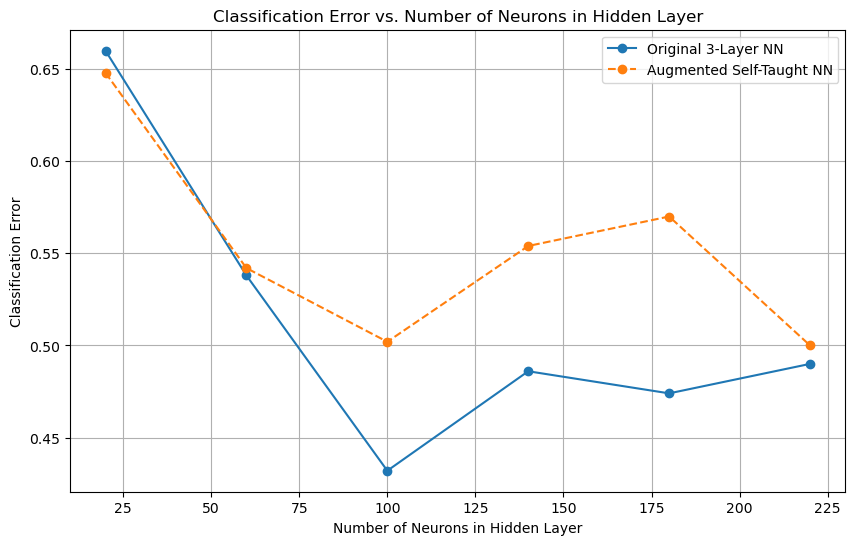

In [54]:
import matplotlib.pyplot as plt
hidden_sizes = list(range(20, 221, 40))  

# Plotting 
plt.figure(figsize=(10, 6))
plt.plot(hidden_sizes, list_error, marker='o', label='Original 3-Layer NN')
plt.plot(hidden_sizes, test_errors_augmented, marker='o',  linestyle='--',label='Augmented Self-Taught NN')
plt.title("Classification Error vs. Number of Neurons in Hidden Layer")
plt.xlabel("Number of Neurons in Hidden Layer")
plt.ylabel("Classification Error")
plt.legend()
plt.grid(True)
plt.show()


## Plot: 
Here x axis represent the number of neurons in hidden layer which is increaing from 20-225 and y axis is classification error. The doted line represents augmented self taught nn and the solid one represents original 3 layer neural network

## Overall Trend:

* -Both the original 3-layer neural network and the augmented self-taught network show a general trend where the classification error decreases as the number of neurons in the hidden layer increases up to a certain point, after which the error rates either stabilize or slightly increase.


## Comparision of  Performance : 

* The augmented network consistently shows higher classification errors compared to the original 3-layer network across most of the neuron counts. This is an unexpected pattern since the augmented network has additional features , which are typically expected to enhance the model's learning capability.These features are designed to capture more complex patterns in the data.It seems like if the features extracted by the autoencoder are not relevant or are too noisy , they might not provide beneficial information and could even degrade the classifier’s performance.

* Both networks appear to have an optimal point (around 100 neurons) where the classification error is minimized. Beyond this point, particularly for the augmented network, there seems to be an increase in error.

* The differences in performance between the original 3-layer neural networks and the augmented self-taught networks as observed in the plot suggest that merely adding  features does not inherently result in better predictive performance.  It underscores the importance of feature selection and model evaluation in machine learning. 

## Summary

* The plot compares the classification error rates of an original 3-layer neural network and an augmented self-taught neural network, as the number of neurons in their hidden layers increases from 20 to 225. While both networks show an initial decrease in error rates that stabilize or increase after reaching an optimal point around 100 neurons, the augmented network consistently exhibits higher error rates across most neuron counts. This suggests that the additional features derived from an autoencoder, despite being designed to enhance model capability by capturing complex data patterns, do not consistently improve performance and might even introduce noise or irrelevance, leading to increased error rates. This comparison highlights the critical importance of feature relevance and careful model evaluation.